# Footprint comparison

### Loading twiss and survey for both IPs

In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import numpy as np
import time
from rich.progress import track
from rich.progress import Progress

import Backend.InteractionPoint as inp
import Backend.Detuning as dtune
import Backend.Footprint as fp
import Backend.BeamPhysics as BP

# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


B1 = inp.Beam('b1',twiss_b1,survey_b1,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)
    
B2 = inp.Beam('b2',twiss_b2,survey_b2,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

IP1 = inp.InteractionPoint('ip1',B1,B2)
IP5 = inp.InteractionPoint('ip5',B1,B2)

In [53]:
B1.ho.index

Index(['bb_ho.l5b1_05', 'bb_ho.l5b1_04', 'bb_ho.l5b1_03', 'bb_ho.l5b1_02',
       'bb_ho.l5b1_01', 'bb_ho.c5b1_00', 'bb_ho.r5b1_01', 'bb_ho.r5b1_02',
       'bb_ho.r5b1_03', 'bb_ho.r5b1_04', 'bb_ho.r5b1_05'],
      dtype='object')

### Generating amplitude distribution

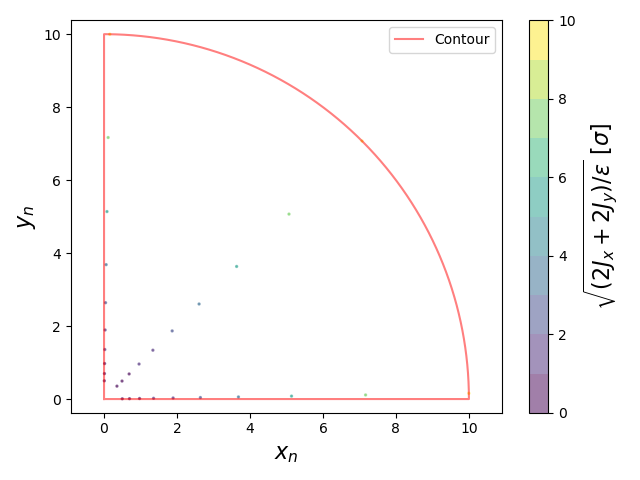

In [2]:

# Generating Coord grid
#=========================================================
#coordinates = fp.generate_coordGrid([0.05,10],[0.01*np.pi/2,0.99*np.pi/2],labels = ['r_n','theta_n'],nPoints=500)
coordinates = fp.generate_coordGrid(np.logspace(np.log10(0.5),np.log10(10),10),
                                    np.linspace(0.01*np.pi/2,0.99*np.pi/2,3),labels = ['r_n','theta_n'])

coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))


coordinates.insert(0,'J_x',(coordinates['x_n']**2)*B1.emittx/2)
coordinates.insert(1,'J_y',(coordinates['y_n']**2)*B1.emitty/2)

coordinates.sort_values(by=['r_n'],inplace=True)
#=========================================================




# Generating contour
#=========================================================
p_by_seg = 200

cr     = np.array(list(np.linspace(0,10,p_by_seg)) + list(10*np.ones(p_by_seg))             + list(np.flip(np.linspace(0,10,p_by_seg))))
ctheta = np.array(list(np.zeros(p_by_seg))         + list(np.linspace(0,np.pi/2,p_by_seg)) + list(np.pi/2*np.ones(p_by_seg)))
ctour = pd.DataFrame({'r_n':cr,'theta_n':ctheta})

ctour.insert(0,'x_n',ctour['r_n']*np.cos(ctour['theta_n']))
ctour.insert(1,'y_n',ctour['r_n']*np.sin(ctour['theta_n']))


ctour.insert(0,'J_x',(ctour['x_n']**2)*B1.emittx/2)
ctour.insert(1,'J_y',(ctour['y_n']**2)*B1.emitty/2)
#=========================================================



# plotting coordinates
plt.figure()
plt.scatter(coordinates['x_n'],coordinates['y_n'],s=2,c=coordinates['r_n'],alpha=0.5,norm = BoundaryNorm(boundaries=np.linspace(0,10,11), ncolors=256))
plt.plot(ctour['x_n'],ctour['y_n'],alpha=0.5,color='red',label='Contour')
plt.xlabel(r'$x_n$',fontsize=16);
plt.ylabel(r'$y_n$',fontsize=16);
plt.axis('equal');
plt.legend()

cbar = plt.colorbar()
plt.set_cmap('viridis')
cbar.ax.set_ylim([0,np.max(coordinates['r_n'])])
cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=16)

plt.tight_layout()

###  Octupolar approximation


In [11]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import numpy as np
import time
from rich.progress import track
from rich.progress import Progress

import Backend.InteractionPoint as inp
import Backend.Detuning as dtune
import Backend.Footprint as fp
import Backend.BeamPhysics as BP

# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


B1 = inp.Beam('b1',twiss_b1,survey_b1,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)
    
B2 = inp.Beam('b2',twiss_b2,survey_b2,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

IP1 = inp.InteractionPoint('ip1',B1,B2)
IP5 = inp.InteractionPoint('ip5',B1,B2)



x_n = np.linspace(0.001,10,100)
Jx

50

### Full analytic computation (Drobrin's method)

In [1]:
1/6

0.16666666666666666

Output()

/home/pbelange/abp/BBFootprint/Backend/Detuning.py:71: RuntimeWarning: overflow encountered 
in double_scalars
  return sign*np.exp(-X-2*Y)/2/np.pi * integratedFactor

/home/pbelange/abp/BBFootprint/Backend/Detuning.py:79: RuntimeWarning: invalid value 
encountered in double_scalars
  return np.exp(-t/2*(azbar-dzbar)**2)*Bess2D_0(X,Y)

/home/pbelange/abp/BBFootprint/Backend/Detuning.py:111: IntegrationWarning: The occurrence of
roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda t: dC00dy_generating(t,ax,ay,r,dx_n,dy_n), 0, 1)[0]

/home/pbelange/abp/BBFootprint/Backend/Detuning.py:111: IntegrationWarning: The maximum 
number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda t: dC00dy_generating(t,ax,ay,r,dx_n,dy_n), 0, 1)[0]

/home/pbelange/abp/BBFootprint/Backend/Detuning.py:131: RuntimeWarning: overflow encountered 
in exp
  return etaz*np.exp(-t/2*(azbar-dzbar)**2)*(np.exp(-X-2*Y)/2/np.pi)*integratedFactor

/home/pbelange/abp/BBFootprint/Backend/Detuning.py:131: RuntimeWarning: invalid value 
encountered in double_scalars
  return etaz*np.exp(-t/2*(azbar-dzbar)**2)*(np.exp(-X-2*Y)/2/np.pi)*integratedFactor

/home/pbelange/abp/BBFootprint/Backend/Detuning.py:107: IntegrationWarning: The maximum 
number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda t: dC00dx_generating(t,ax,ay,r,dx_n,dy_n), 0, 1)[0]

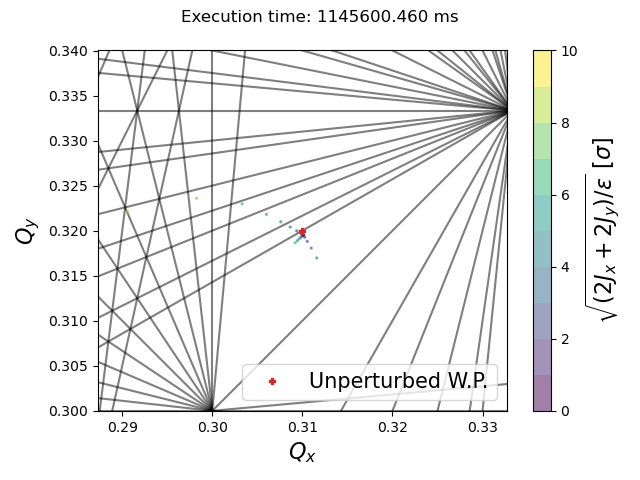

In [2]:
from rich.progress import Progress, BarColumn, TextColumn,TimeElapsedColumn,SpinnerColumn, TimeRemainingColumn
import time
from matplotlib.colors import BoundaryNorm


#=========================================================
#coordinates = fp.generate_coordGrid([0.05,10],[0.01*np.pi/2,0.99*np.pi/2],labels = ['r_n','theta_n'],nPoints=500)
coordinates = fp.generate_coordGrid(np.linspace(0.5,10,10),
                                    np.linspace(0.01*np.pi/2,0.99*np.pi/2,3),labels = ['r_n','theta_n'])

coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))

coordinates.insert(0,'J_x',(coordinates['x_n']**2)*B1.emittx/2)
coordinates.insert(1,'J_y',(coordinates['y_n']**2)*B1.emitty/2)
 

#========================================================= 
for _dx in dx_vec:
    _DQx,_DQy = dtune.DQx_DQy( ax   = [1e-6],
                               ay   = [1e-6],
                               r    = 1,#main_ho['r'],
                               dx_n = _dx,
                               dy_n = 0,
                               xi   = IP1.b2.xi)

    Bess_DQx.append(_DQx)
    Bess_DQy.append(_DQy)

def compute_lr_ho_footprint(coord):
    
    DQx_oct,DQy_oct = np.zeros(len(coord['J_x'])),np.zeros(len(coord['J_x']))
    DQx_ho ,DQy_ho  = np.zeros(len(coord['J_x'])),np.zeros(len(coord['J_x']))

    with Progress(
    "{task.description}",
    SpinnerColumn(),
    BarColumn(bar_width=40),
    TextColumn("[progress.percentage]{task.percentage:>3.0f}%"),TimeElapsedColumn(),TimeRemainingColumn()) as progress:

        task1 = progress.add_task("[red]Both IPs...", total=2)
        task2 = progress.add_task("[green]Each BBLR...", total=len(IP1.lr))

        for _IP in [IP1,IP5]:

            # Computing octupolar effect
            #------------------------------
            # Iterating over LR only
            progress.update(task2,completed=0,refresh =True)
            for index, _bb in _IP.lr.iterrows():
                _DQx,_DQy = dtune.DQx_DQy( ax   = coord['x_n'],
                                           ay   = coord['y_n'],
                                           r    = _bb['r'],
                                           dx_n = _bb['dx_n'],
                                           dy_n = _bb['dy_n'],
                                           xi   = _IP.b2.xi)

                DQx_oct += _DQx
                DQy_oct += _DQy
                
                progress.reset(task2,completed = progress.tasks[task2].completed)
                progress.update(task2,advance=1,refresh =True)


            # Computing Head-on component (ex: bb_ho.c1b1_00):
            main_ho = _IP.ho.loc[f'bb_ho.c{_IP.name[-1]}b1_00']
            #------------------------------
            _DQx,_DQy = dtune.DQx_DQy( ax   = coord['x_n'],
                                       ay   = coord['y_n'],
                                       r    = main_ho['r'],
                                       dx_n = main_ho['dx_n'],
                                       dy_n = main_ho['dy_n'],
                                       xi   = _IP.b2.xi)
            DQx_ho += 0*_DQx
            DQy_ho += 0*_DQy
            
            progress.update(task1,advance=1,refresh =True)
        
    return (DQx_oct,DQy_oct),(DQx_ho,DQy_ho)


# COMPUTING
#=========================
s_time = time.time()
(DQx_oct,DQy_oct),(DQx_ho,DQy_ho) = compute_lr_ho_footprint(coordinates)
e_time = time.time()

# Computing for contour as well
#(c_DQx_oct,c_DQy_oct),(c_DQx_ho,c_DQy_ho) = compute_lr_ho_footprint(ctour)

    
# PLOTTING
#================================================================
Qx_0,Qy_0 = 0.31,0.32
plt.figure()
plt.suptitle(f'Execution time: {(e_time-s_time)/1e-3:.3f} ms')
BP.plotWorkingDiagram(order = 12,QxRange=np.array([0.25,0.35]),QyRange=np.array([0.25,0.35]),zorder=-1000)

#plt.plot(Qx_0 + c_DQx_ho + c_DQx_oct,Qy_0 + c_DQy_ho + c_DQy_oct,alpha=0.5,color='red',label='Contour')
plt.scatter(Qx_0 + DQx_ho + DQx_oct,Qy_0 + DQy_ho + DQy_oct,s=2,
            c=coordinates['r_n'],alpha=0.5,norm = BoundaryNorm(boundaries=np.linspace(0,10,11), ncolors=256))

plt.plot([Qx_0],[Qy_0],'P',markersize=5,color='C3',label='Unperturbed W.P.')


plt.axis('equal')

window = 0.02
color = 'viridis'
plt.xlim([0.31-window,0.31+window])
plt.ylim([0.32-window,0.32+window])

cbar = plt.colorbar()
plt.set_cmap(color)
cbar.ax.set_ylim([0,np.max(coordinates['r_n'])])

plt.legend(fontsize=15)

plt.xlabel(r'$Q_x$',fontsize=16)
plt.ylabel(r'$Q_y$',fontsize=16)
cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=16)

plt.tight_layout()



Output()

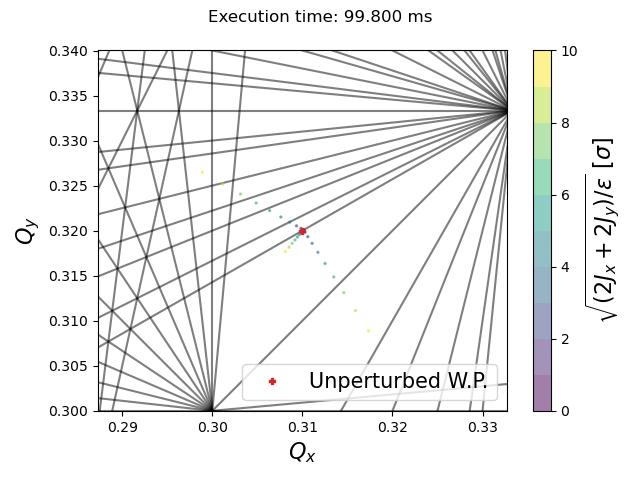

In [3]:

def compute_lr_ho_footprint(coord):
    
    DQx_oct,DQy_oct = np.zeros(len(coord['J_x'])),np.zeros(len(coord['J_x']))
    DQx_ho ,DQy_ho  = np.zeros(len(coord['J_x'])),np.zeros(len(coord['J_x']))

    with Progress() as progress:

        task1 = progress.add_task("[red]Both IPs...", total=2)
        task2 = progress.add_task("[green]Each BBLR...", total=len(IP1.lr))

        for _IP in [IP1,IP5]:

            # Computing octupolar effect
            #------------------------------
            # Iterating over LR only
            progress.update(task2,completed=0,refresh =True)
            for index, _bb in _IP.lr.iterrows():
                _DQx,_DQy = dtune.BBLR_octupole(  coord['J_x'],
                                                  coord['J_y'],
                                                  betx = _bb['betx'],
                                                  bety = _bb['bety'],
                                                  k1   = _bb['k1'],
                                                  k3   = _bb['k3'])

                DQx_oct += _DQx
                DQy_oct += _DQy
                
                progress.update(task2, advance=1)


            # Computing Head-on component (ex: bb_ho.c1b1_00):
            main_ho = _IP.ho.loc[f'bb_ho.c{_IP.name[-1]}b1_00']
            #------------------------------
            _DQx,_DQy =  dtune.HeadOn_round(coord['J_x'],coord['J_y'],_IP.b2.emittx,_IP.b2.xi)
            DQx_ho += 0*_DQx
            DQy_ho += 0*_DQy
            
            progress.update(task1, advance=1,refresh=True)

            
    return (DQx_oct,DQy_oct),(DQx_ho,DQy_ho)


# COMPUTING
#=========================
s_time = time.time()
(DQx_oct,DQy_oct),(DQx_ho,DQy_ho) = compute_lr_ho_footprint(coordinates)
e_time = time.time()

# Computing for contour as well
#(c_DQx_oct,c_DQy_oct),(c_DQx_ho,c_DQy_ho) = compute_lr_ho_footprint(ctour)

    
# PLOTTING
#================================================================
Qx_0,Qy_0 = 0.31,0.32
plt.figure()
plt.suptitle(f'Execution time: {(e_time-s_time)/1e-3:.3f} ms')
BP.plotWorkingDiagram(order = 12,QxRange=np.array([0.25,0.35]),QyRange=np.array([0.25,0.35]),zorder=-1000)

#plt.plot(Qx_0 + c_DQx_ho + c_DQx_oct,Qy_0 + c_DQy_ho + c_DQy_oct,alpha=0.5,color='red',label='Contour')
plt.scatter(Qx_0 + DQx_ho + DQx_oct,Qy_0 + DQy_ho + DQy_oct,s=2,
            c=coordinates['r_n'],alpha=0.5,norm = BoundaryNorm(boundaries=np.linspace(0,10,11), ncolors=256))

#plt.scatter(Qx_0 +t_DQx_ho + t_DQx_oct,Qy_0 + t_DQy_ho + t_DQy_oct,s=2,
#            c=coordinates['r_n'],alpha=0.5,norm = BoundaryNorm(boundaries=np.linspace(0,10,11), ncolors=256))

plt.plot([Qx_0],[Qy_0],'P',markersize=5,color='C3',label='Unperturbed W.P.')


plt.axis('equal')

window = 0.02
color = 'viridis'
plt.xlim([0.31-window,0.31+window])
plt.ylim([0.32-window,0.32+window])

cbar = plt.colorbar()
plt.set_cmap(color)
cbar.ax.set_ylim([0,np.max(coordinates['r_n'])])

plt.legend(fontsize=15)

plt.xlabel(r'$Q_x$',fontsize=16)
plt.ylabel(r'$Q_y$',fontsize=16)
cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=16)

plt.tight_layout()



In [52]:
IP1.b2.emittx,IP1.b2.xi

(3.449053778366961e-10, 0.005617860836878258)

In [56]:
dtune.HeadOn_round(coordinates['J_x'],coordinates['J_y'],IP1.b2.emittx,IP1.b2.xi)

(array([-0.00842426, -0.00736843, -0.00599553, -0.00464103, -0.00350366,
        -0.00263627, -0.00200652, -0.00155632, -0.00123266, -0.00099614,
        -0.0084892 , -0.00758648, -0.00636601, -0.00509533, -0.00395988,
        -0.00303848, -0.00233275, -0.00180808, -0.00142195, -0.00113701,
        -0.00855674, -0.00784094, -0.00688413, -0.00589821, -0.00501865,
        -0.00429412, -0.00371829, -0.00326398, -0.00290254, -0.00261068]),
 array([-0.00855674, -0.00784094, -0.00688413, -0.00589821, -0.00501865,
        -0.00429412, -0.00371829, -0.00326398, -0.00290254, -0.00261068,
        -0.0084892 , -0.00758648, -0.00636601, -0.00509533, -0.00395988,
        -0.00303848, -0.00233275, -0.00180808, -0.00142195, -0.00113701,
        -0.00842426, -0.00736843, -0.00599553, -0.00464103, -0.00350366,
        -0.00263627, -0.00200652, -0.00155632, -0.00123266, -0.00099614]))

In [50]:

def get_elapsed(s):a
    dt = pd.to_datetime(s, unit='s')
    return ':'.join([f"{dt.hour}".zfill(2),f"{dt.minute}".zfill(2),f"{dt.second}".zfill(2)])
time_remaining = 0
with Progress(
    "{task.description}",
    SpinnerColumn(),
    BarColumn(bar_width=40),
    TextColumn("[progress.percentage]{task.percentage:>3.0f}%"),TimeElapsedColumn(),TextColumn(f"{get_elapsed(time_remaining)}")) as progress:
        time_remaining=600
        task1 = progress.add_task("[red]Both IPs...", total=2)
        task2 = progress.add_task("[green]Each BBLR...", total=len(IP1.lr))
        

Output()

In [41]:
f'{"2".zfill(2)}aa'.zfill(4)

'02aa'

In [45]:
f'{2}'.zfill(2)

'02'

# Tracking

In [9]:
# Generating Coord grid
#=========================================================
#coordinates = fp.generate_coordGrid([0.05,10],[0.01*np.pi/2,0.99*np.pi/2],labels = ['r_n','theta_n'],nPoints=500)
coordinates = fp.generate_coordGrid(np.logspace(np.log10(0.5),np.log10(10),10),
                                    np.linspace(0.01*np.pi/2,0.99*np.pi/2,3),labels = ['r_n','theta_n'])

coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))


coordinates.insert(0,'J_x',(coordinates['x_n']**2)*B1.emittx/2)
coordinates.insert(1,'J_y',(coordinates['y_n']**2)*B1.emitty/2)

coordinates.sort_values(by=['r_n'],inplace=True)
#=========================================================

In [10]:
coordinates

,J_x,J_y,x_n,y_n,r_n,theta_n
0,4.310254e-11,1.063687e-14,0.499938,0.007854,0.500000,0.015708
20,1.063687e-14,4.310254e-11,0.007854,0.499938,0.500000,1.555088
10,2.155659e-11,2.155659e-11,0.353553,0.353553,0.500000,0.785398
1,8.387269e-11,2.069816e-14,0.697389,0.010955,0.697475,0.015708
21,2.069816e-14,8.387269e-11,0.010955,0.697389,0.697475,1.555088
11,4.194670e-11,4.194670e-11,0.493190,0.493190,0.697475,0.785398
2,1.632068e-10,4.027630e-14,0.972824,0.015282,0.972944,0.015708
22,4.027630e-14,1.632068e-10,0.015282,0.972824,0.972944,1.555088
12,8.162356e-11,8.162356e-11,0.687975,0.687975,0.972944,0.785398
3,3.175822e-10,7.837316e-14,1.357041,0.021318,1.357209,0.015708


In [58]:
tracker.vars['test'] = 2
tracker.element_refs[IP1.b1.ho.index[4]].N_part_per_slice._value

array([2.])

In [63]:
'ip3' in tracker.element_refs._owner.keys()

True

In [64]:
allElements = list(tracker.element_refs._owner.keys())

In [54]:
tracker.element_refs[IP1.b1.ho.index[4]].N_part_per_slice = tracker.vars['test']//

In [84]:
inspect(tracker.element_refs[_bb]._value,all=True)

╭───────────── <class 'xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D'> ─────────────╮
│ ╭───────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xfields.beam_elements.beambeam3d.BeamBeamBiGaussian3D object at 0x7f643c85d3a0>      │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                           │
│                    alpha = -4.740052901579744e-05                                         │
│         boost_parameters = BoostParameters(...)                                           │
│                  _buffer = <BufferNumpy 3283368/7906560>                                  │
│               Ddelta_sub = 3.3653434577027275e-11                                         │
│                 delta_CO = 1.4637810985540511e-06                                         │
│                  delta_x = -2.1884863599552773e-05                                        │
│                  delta_y = 2.083751238417065e-09                                          │
│                 __dict__ = {                                                              │
│                                '_xobject': BeamBeamBiGaussian3DData(...),                 │
│                                'phi': 0.00016000250388758253,                             │
│                                'alpha': -4.740052901579744e-05,                           │
│                                'zeta_slices': [0.0],                                      │
│                                'Sig_11_0': 1.2700231777970808e-10,                        │
│                                'Sig_12_0': 6.644856921543978e-11,                         │
│                                'Sig_13_0': 0.0,                                           │
│                                'Sig_14_0': 0.0,                                           │
│                                'Sig_22_0': 9.716985366706133e-10,                         │
│                                'Sig_23_0': 0.0,                                           │
│                                'Sig_24_0': 0.0,                                           │
│                                'Sig_33_0': 1.270074375072765e-10,                         │
│                                'Sig_34_0': 6.647122613744758e-11,                         │
│                                'Sig_44_0': 9.716830786355407e-10                          │
│                            }                                                              │
│                  __doc__ = None                                                           │
│                  Dpx_sub = 2.0892492624249772e-07                                         │
│                  Dpy_sub = -1.989263363739724e-11                                         │
│               Dsigma_sub = 7.940933880509066e-23                                          │
│                   Dx_sub = -7.315789684117502e-16                                         │
│                   Dy_sub = 6.965687938309046e-20                                          │
│                  _fields = [                                                              │
│                                'q0',                                                      │
│                                'boost_parameters',                                        │
│                                'Sigmas_0_star',                                           │
│                                'min_sigma_diff',                                          │
│                                'threshold_singular',                                      │
│                                'num_slices',                                              │
│                                'delta_x',                                                 │
│                                'delta_y',         

In [81]:
tracker.element_refs[bb_lr[3]].n_particles._value/1e11

1.4

In [77]:
inspect(tracker.element_refs[bb_lr[3]]._value,all=True)

╭────────────── <class 'xfields.beam_elements.beambeam.BeamBeamBiGaussian2D'> ──────────────╮
│ Simulates the effect of beam-beam on a bunch.                                             │
│                                                                                           │
│ ╭───────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xfields.beam_elements.beambeam.BeamBeamBiGaussian2D object at 0x7f643916f340>        │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                           │
│                    beta0 = 0.9999999904805956                                             │
│                  _buffer = <BufferNumpy 3283368/7906560>                                  │
│                     d_px = 1.488363608073028e-09                                          │
│                     d_py = -4.0399767162955765e-09                                        │
│                 __dict__ = {                                                              │
│                                '_xobject': BeamBeamBiGaussian2DData(...),                 │
│                                '_dressed_fieldmap':                                       │
│                            <xfields.fieldmaps.bigaussian.BiGaussianFieldMap object at     │
│                            0x7f643916f310>                                                │
│                            }                                                              │
│                  __doc__ = '\n    Simulates the effect of beam-beam on a bunch.\n\n       │
│                            Args:\n        context (xobjects context): identifies the      │
│                            :doc:`context <contexts>`\n            on which the            │
│                            computation is executed.\n        n_particles (float64):       │
│                            Number of particles in the colliding bunch.\n        q0        │
│                            (float64): Number of particles in the colliding bunch.\n       │
│                            beta0 (float64): Relativistic beta of the colliding bunch.\n   │
│                            mean_x (float64): Horizontal position (in meters) of the       │
│                            colliding\n            bunch. It can be updated after the      │
│                            object creation.\n            Default is ``0.``.\n             │
│                            mean_y (float64): Vertical position (in meters) of the         │
│                            Gaussian\n            distribution. It can be updated after    │
│                            the object creation.\n            Default is ``0.``.\n         │
│                            sigma_x (float64): Horizontal r.m.s. size (in meters) of the   │
│                            colliding\n            bunch. It can be updated after the      │
│                            object creation.\n            Default is ``None``.\n           │
│                            sigma_y (float64): Vertical r.m.s. size (in meters) of the     │
│                            colliding\n            bunch. It can be updated after the      │
│                            object creation.\n            Default is ``None``.\n           │
│                            Returns:\n        (BeamBeamBiGaussian2D): A beam-beam          │
│                            element.\n    '                                                │
│        _dressed_fieldmap = <xfields.fieldmaps.bigaussian.BiGaussianFieldMap object at     │
│                            0x7f643916f310>                                                │
│                 fieldmap = <xfields.fieldmaps.bigaussian.BiGaussianFieldMap object at     │
│                            0x7f643916f310>                                                │
│                  _fields = ['n_particles', 'q0', '

In [90]:
bb_lr = [name for name in allElements if ('bb_lr' in name)]

In [91]:
bb_lr

['bb_lr.l5b1_25',
 'bb_lr.l5b1_24',
 'bb_lr.l5b1_23',
 'bb_lr.l5b1_22',
 'bb_lr.l5b1_21',
 'bb_lr.l5b1_20',
 'bb_lr.l5b1_19',
 'bb_lr.l5b1_18',
 'bb_lr.l5b1_17',
 'bb_lr.l5b1_16',
 'bb_lr.l5b1_15',
 'bb_lr.l5b1_14',
 'bb_lr.l5b1_13',
 'bb_lr.l5b1_12',
 'bb_lr.l5b1_11',
 'bb_lr.l5b1_10',
 'bb_lr.l5b1_09',
 'bb_lr.l5b1_08',
 'bb_lr.l5b1_07',
 'bb_lr.l5b1_06',
 'bb_lr.l5b1_05',
 'bb_lr.l5b1_04',
 'bb_lr.l5b1_03',
 'bb_lr.l5b1_02',
 'bb_lr.l5b1_01',
 'bb_lr.r5b1_01',
 'bb_lr.r5b1_02',
 'bb_lr.r5b1_03',
 'bb_lr.r5b1_04',
 'bb_lr.r5b1_05',
 'bb_lr.r5b1_06',
 'bb_lr.r5b1_07',
 'bb_lr.r5b1_08',
 'bb_lr.r5b1_09',
 'bb_lr.r5b1_10',
 'bb_lr.r5b1_11',
 'bb_lr.r5b1_12',
 'bb_lr.r5b1_13',
 'bb_lr.r5b1_14',
 'bb_lr.r5b1_15',
 'bb_lr.r5b1_16',
 'bb_lr.r5b1_17',
 'bb_lr.r5b1_18',
 'bb_lr.r5b1_19',
 'bb_lr.r5b1_20',
 'bb_lr.r5b1_21',
 'bb_lr.r5b1_22',
 'bb_lr.r5b1_23',
 'bb_lr.r5b1_24',
 'bb_lr.r5b1_25',
 'bb_lr.l8b1_20',
 'bb_lr.l8b1_19',
 'bb_lr.l8b1_18',
 'bb_lr.l8b1_17',
 'bb_lr.l8b1_16',
 'bb_lr.l8

In [102]:
tracker.element_refs[bb_lr[-1]].n_particles = tracker.vars[f'{_ip}_bblr_ON']*tracker.element_refs[bb_lr[-1]].n_particles._value

In [103]:
tracker.element_refs[bb_lr[-1]].n_particles._expr

(vars['ip1_bblr_ON']*140000000000.0)

In [99]:
tracker.vars[f'{_ip}_bblr_ON']

vars['ip1_bblr_ON']

In [97]:
tracker.vars[bb_lr[-1]].n_particles._value

vars['bb_lr.r1b1_25'].n_particles._value

In [110]:

_lr = bb_lr[0]
tracker.element_refs[_lr].n_particles = tracker.vars[f'{_ip}_bblr_ON']*tracker.element_refs[_lr].n_particles._value

In [114]:
f'{_ip}_bblr_ON'

'ip1_bblr_ON'

In [113]:
tracker.vars[f'test'] = 0

In [121]:
tracker.vars[f'{_ip}_bbho_ON'] = 2

In [123]:
for _ho in bb_ho:
    print(tracker.element_refs[_ho].N_part_per_slice._expr)

(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])
(vars['ip8_bbho_ON']*[0.])


In [122]:
#.N_part_per_slice
for _ip in ['ip5','ip2','ip8']:
    bb_lr = [name for name in allElements if ('bb_lr' in name)&(f'{_ip[-1]}b1' in name)]
    bb_ho = [name for name in allElements if ('bb_ho' in name)&(f'{_ip[-1]}b1' in name)]

    # New knob:
    tracker.vars[f'{_ip}_bblr_ON'] = 0
    tracker.vars[f'{_ip}_bbho_ON'] = 0
    
    
    # Linking to new knob
    for _lr in bb_lr:
        tracker.element_refs[_lr].n_particles = tracker.vars[f'{_ip}_bblr_ON']*tracker.element_refs[_lr].n_particles._value
    for _ho in bb_ho:
        tracker.element_refs[_ho].N_part_per_slice = tracker.vars[f'{_ip}_bbho_ON']*tracker.element_refs[_ho].N_part_per_slice._value

In [15]:
for _bb in list(IP1.b1.ho.index)+list(IP5.b1.ho.index):
    tracker.element_refs[a_bb].N_part_per_slice._set_value(0)

116.10671646212842

In [1]:
pwd

'/home/pbelange/abp/BBFootprint'

In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from rich.progress import track as pbar
import json
import pandas as pd

import Backend.InteractionPoint as inp
import Backend.Detuning as dtune
import Backend.Footprint as fp
import Backend.BeamPhysics as BP
import Backend.Constants as cst

import xobjects as xo
import xtrack as xt
import xpart as xp


# Importing twiss and survey
twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


B1 = inp.Beam('b1',twiss_b1,survey_b1,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)
    
B2 = inp.Beam('b2',twiss_b2,survey_b2,
              Nb       = 1.15e11,
              E        = 6.8e12,
              emittx_n = 2.5e-6,
              emitty_n = 2.5e-6,
              dp_p0    = 0)

IP1 = inp.InteractionPoint('ip1',B1,B2)
IP5 = inp.InteractionPoint('ip5',B1,B2)

# Setting up Tracking
#===================================================
beam = 'b1'
fname_line_particles= f'xsuite_lines/001_{beam}_line_bb_wire.json'
#fname_line_particles= f'xsuite_lines/test_no_coupling.json'
with open(fname_line_particles, 'r') as fid:
    input_data = json.load(fid)
line = xt.Line.from_dict(input_data)
line.particle_ref = xp.Particles.from_dict(input_data['particle_on_tracker_co'])

tracker = xt.Tracker(line=line)
tw = tracker.twiss()
clear_output(wait=False) #to clear xtrack output



# Deactivating all wires
#===================================================
tracker.vars['enable_qff'] = 0
for IP in ['ip1','ip5']:
    tracker.vars[f"bbcw_rw_{IP}.{beam}"] = 1
    tracker.vars[f"bbcw_i_{IP}.{beam}"]  = 0

# Deactivating cavities:
#===================================================
tracker.vars['cavities_ON']  = 1
tracker.vars['vrf400'] = tracker.vars['cavities_ON']*tracker.vars['vrf400']._value

# Deactivating SEXTUPOLES and  OCTUPOLES
#===================================================
allVars = list(tracker.vars._owner.keys())
allElements = list(tracker.element_refs._owner.keys())

ks = [name for name in allVars if ('ksf' in name)|('ksd' in name)]
ko = [name for name in allVars if ('kof.a' in name)|('kod.a' in name)]

tracker.vars['all_oct_ON']  = 0
tracker.vars['all_sext_ON'] = 0
for _ks in ks:
    if tracker.vars[_ks]._expr is not None:
        tracker.vars[_ks] = tracker.vars['all_sext_ON']*tracker.vars[_ks]._expr
    else:
        tracker.vars[_ks] = tracker.vars['all_sext_ON']*tracker.vars[_ks]._value
        
for _ko in ko:
    if tracker.vars[_ko]._expr is not None:
        tracker.vars[_ko] = tracker.vars['all_oct_ON'] *tracker.vars[_ko]._expr 
    else:
        tracker.vars[_ko] = tracker.vars['all_oct_ON'] *tracker.vars[_ko]._value

# Keeping only LR in ip1 and ip5:
#===================================================

#.N_part_per_slice
for _ip in ['ip1','ip5','ip2','ip8']:
    bb_lr = [name for name in allElements if ('bb_lr' in name)&(f'{_ip[-1]}b1' in name)]
    bb_ho = [name for name in allElements if ('bb_ho' in name)&(f'{_ip[-1]}b1' in name)]

    # New knob:
    tracker.vars[f'{_ip}_bblr_ON'] = 0
    tracker.vars[f'{_ip}_bbho_ON'] = 0
    
    
    # Linking to new knob
    for _lr in bb_lr:
        tracker.element_refs[_lr].n_particles      = tracker.vars[f'{_ip}_bblr_ON']*tracker.element_refs[_lr].n_particles._value
    for _ho in bb_ho:
        tracker.element_refs[_ho].N_part_per_slice = tracker.vars[f'{_ip}_bbho_ON']*tracker.element_refs[_ho].N_part_per_slice._value[0]
        
tracker.vars[f'ip1_bblr_ON'] = 0
tracker.vars[f'ip5_bblr_ON'] = 0

tracker.vars[f'ip1_bbho_ON'] = 1
tracker.vars[f'ip5_bbho_ON'] = 1

tracker.vars['cmrs.b1_sq'] = 0
tracker.vars['cmis.b1_sq'] = 0


In [12]:

    
# Generating Coord grid
#=========================================================
#coordinates = fp.generate_coordGrid([0.05,10],[0.01*np.pi/2,0.99*np.pi/2],labels = ['r_n','theta_n'],nPoints=500)
coordinates = fp.generate_coordGrid(np.linspace(0.5,10,30),
                                    np.linspace(0.1*np.pi/2,0.9*np.pi/2,5),labels = ['r_n','theta_n'])

coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))

coordinates.insert(0,'J_x',(coordinates['x_n']**2)*B1.emittx/2)
coordinates.insert(1,'J_y',(coordinates['y_n']**2)*B1.emitty/2)
 
for plane in ['x','y']:
    alpha,beta = tw[f'alf{plane}'][0],tw[f'bet{plane}'][0]
    gamma = (1+alpha**2)/beta

    phi = 0
    coordinates.insert(0,f'{plane}'  ,np.sqrt(2*beta*coordinates[f'J_{plane}'])*np.cos(phi))
    coordinates.insert(1,f'p_{plane}',-np.sqrt(2*coordinates[f'J_{plane}']/beta)*(np.sin(phi)+alpha*np.cos(phi)))
#========================================================= 

# Setting up the tracker
particles = xp.Particles(
                        p0c=B1.p0*cst.c,
                        x =coordinates['x'],
                        px=coordinates['p_x'],
                        y =coordinates['y'],
                        py=coordinates['p_y'],
                        )

#n_part = 200
#particles = xp.Particles(
#                        p0c=B1.p0*cst.c,
#                        x=np.random.uniform(-1e-3, 1e-3, n_part),
#                        px=np.random.uniform(-1e-5, 1e-5, n_part),
#                        y=np.random.uniform(-2e-3, 2e-3, n_part),
#                        py=np.random.uniform(-3e-5, 3e-5, n_part),
#                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
#                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
#                        )

print('START TRACKING')

tracker.vars[f'ip1_bblr_ON'] = 0
tracker.vars[f'ip5_bblr_ON'] = 0

tracker.vars[f'ip1_bbho_ON'] = 0
tracker.vars[f'ip5_bbho_ON'] = 0


tracker.element_refs['bb_ho.c1b1_00'].N_part_per_slice = 1.4e11
tracker.element_refs['bb_ho.c5b1_00'].N_part_per_slice = 1.4e11






## Track (saving turn-by-turn data)
n_turns = int(1024)
tracker.track(particles, num_turns=n_turns,turn_by_turn_monitor=True)

#================

import pandas as pd

#CONVERT TO PANDAS
tracked = pd.DataFrame(tracker.record_last_track.to_dict()['data'])
tracked = tracked[['at_turn','particle_id','x','px','y','py','zeta','delta']]
tracked.rename(columns={"at_turn": "turn",'particle_id':'number','zeta':'t','delta':'pt'},inplace=True)


START TRACKING


In [65]:
tw2 = tracker.twiss()
print(tw['mux'][-1],tw['muy'][-1])
print(tw2['mux'][-1],tw2['muy'][-1])

62.29944480701487 60.311006067289846
62.30988645269527 60.31963666092746


In [4]:
tracker.vars[f'ip1_bblr_ON'] = 1
tracker.vars[f'ip5_bblr_ON'] = 1

In [11]:
12727272727.272728*11

140000000000.0

In [10]:
bb_ho

['bb_ho.l8b1_05',
 'bb_ho.l8b1_04',
 'bb_ho.l8b1_03',
 'bb_ho.l8b1_02',
 'bb_ho.l8b1_01',
 'bb_ho.c8b1_00',
 'bb_ho.r8b1_01',
 'bb_ho.r8b1_02',
 'bb_ho.r8b1_03',
 'bb_ho.r8b1_04',
 'bb_ho.r8b1_05']

In [14]:
for _ip in ['ip1','ip5','ip2','ip8']:
    bb_ho = [name for name in allElements if ('bb_ho' in name)&(f'{_ip[-1]}b1' in name)]
    for _ho in bb_ho:
        print(tracker.element_refs[_ho].N_part_per_slice._expr,':',tracker.element_refs[_ho].N_part_per_slice._value)
        

(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
None : [1.4e+11]
(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
(vars['ip1_bbho_ON']*12727272727.272728) : [0.]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
None : [1.4e+11]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
(vars['ip5_bbho_ON']*12727272727.272728) : [0.]
(vars[

In [ ]:
for _ip in ['ip1','ip5','ip2','ip8']:
    bb_lr = [name for name in allElements if ('bb_lr' in name)&(f'{_ip[-1]}b1' in name)]
    for _lr in bb_lr:
        print(tracker.element_refs[_lr].n_particles._expr,':',tracker.element_refs[_lr].n_particles._value)
        

In [16]:
np.sqrt(tracker.twiss(at_elements=['ip1'])['bety']/tracker.twiss(at_elements=['ip1'])['betx'])

array([1.03558027])

(0.3, 0.34)

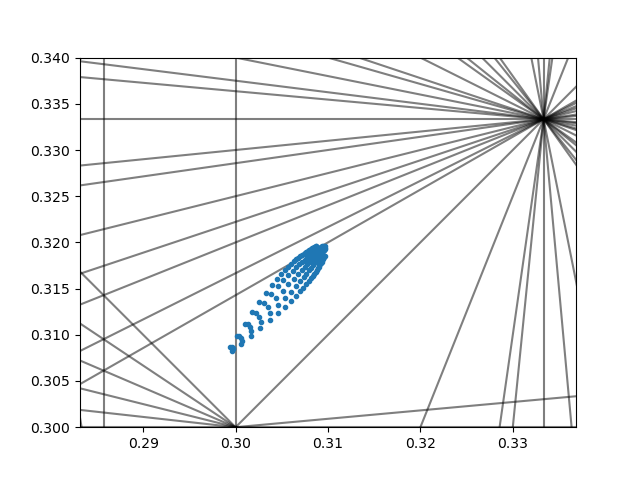

In [13]:
import Backend.BeamPhysics as BP
import Backend.Footprint as fp
%matplotlib widget

tunes = fp.compute_tunes(tracked,method='pynaff')
tunes.insert(2,'Resonance', np.abs(tunes['Qx']-tunes['Qy'])<1e-6)
#tunes_fft = fp.compute_tunes(tracked,method='pynaff')

#============================


plt.figure()
BP.plotWorkingDiagram(order = 12,QxRange=np.array([0.2,0.4]),QyRange=np.array([0.2,0.4]))

plt.plot(tunes['Qx'],tunes['Qy'],'.')
plt.axis('equal')
window = 0.02
#plt.xlim([tw['mux'][-1]-62-window,tw['mux'][-1]-62+window])
#plt.ylim([tw['muy'][-1]-60-window,tw['muy'][-1]-60+window])
plt.xlim([0.31-window,0.31+window])
plt.ylim([0.32-window,0.32+window])

In [34]:
tracker.vars['dqy.b1'.lower()]._value

0.0

In [26]:
[name for name in allVars if 'k' in name]

['l.adtkh',
 'l.adtkv',
 'l.bpmwk',
 'l.bqkh',
 'l.bqkv',
 'l.dfbak',
 'l.mkd',
 'l.mkima192',
 'l.mkima193',
 'l.mkqa',
 'l.omk',
 'kmax_mb',
 'kmax_mbaw',
 'kmax_mblw',
 'kmax_mbrb_4.5k',
 'kmax_mbrc_4.5k',
 'kmax_mbrs_4.5k',
 'kmax_mbw',
 'kmax_mbwmd',
 'kmax_mbx',
 'kmax_mbxw',
 'kmax_mbxwh',
 'kmax_mbxws',
 'kmax_mbxwt',
 'kmax_mcbch',
 'kmax_mcbch_4.5k',
 'kmax_mcbcv',
 'kmax_mcbcv_4.5k',
 'kmax_mcbh',
 'kmax_mcbv',
 'kmax_mcbwh',
 'kmax_mcbwv',
 'kmax_mcbxh',
 'kmax_mcbxv',
 'kmax_mcbyh_4.5k',
 'kmax_mcbyv_4.5k',
 'kmax_mcd',
 'kmax_mco',
 'kmax_mcosx',
 'kmax_mcox',
 'kmax_mcs',
 'kmax_mcssx',
 'kmax_mcsx',
 'kmax_mctx',
 'kmax_mo',
 'kmax_mq',
 'kmax_mqm',
 'kmax_mqm_4.5k',
 'kmax_mqmc',
 'kmax_mqml',
 'kmax_mqml_4.5k',
 'kmax_mqs',
 'kmax_mqsx',
 'kmax_mqt',
 'kmax_mqtlh_4.5k',
 'kmax_mqtli',
 'kmax_mqwa',
 'kmax_mqwb',
 'kmax_mqxa',
 'kmax_mqxb',
 'kmax_mqy_4.5k',
 'kmax_ms',
 'kmax_msda',
 'kmax_msdb',
 'kmax_msdb2',
 'kmax_msdc',
 'kmax_msia',
 'kmax_msib',
 'kmax_mss',
 '

In [12]:
from rich import inspect

In [38]:
inspecline.element_refs['bb_ho.c1b1_00']._value

In [48]:
for tracker.element_refs['bb_ho.c1b1_00'].N_part_per_slice._find_deps()

element_refs['bb_ho.c1b1_00'].N_part_per_slice._find_deps()

In [34]:
'bb_ho.c1b1_00' in line.element_names

True

In [55]:
for _bb in B1.ho.index:
    pass

In [63]:
inspect(tracker.element_refs[_bb].N_part_per_slice,all=True)

╭───────────────────── element_refs['bb_ho.l5b1_05'].N_part_per_slice ──────────────────────╮
│                 __doc__ = None                                                            │
│                   _expr = None                                                            │
│                    _key = 'N_part_per_slice'                                              │
│                _manager = <xdeps.tasks.Manager object at 0x7f7550a66070>                  │
│              __module__ = 'xdeps.refs'                                                    │
│               __slots__ = ('_owner', '_key', '_manager')                                  │
│                  _tasks = set()                                                           │
│                  _value = array([1.27272727e+10])                                         │
│                 __abs__ = def __abs__(other):                                             │
│                 __add__ = def __add__(other):                                             │
│                 __and__ = def __and__(other):                                             │
│                __call__ = def __call__(*args, **kwargs): Call self as a function.         │
│                __ceil__ = def __ceil__(other):                                            │
│               __class__ = class __class__(_owner, _key, _manager=None):                   │
│             __complex__ = def __complex__(other):                                         │
│             __delattr__ = def __delattr__(name, /): Implement delattr(self, name).        │
│                 __dir__ = def __dir__(): Default dir() implementation.                    │
│              __divmod__ = def __divmod__(other):                                          │
│                  __eq__ = def __eq__(other): Return self==value.                          │
│                   _eval = def _eval(expr, gbl=None):                                      │
│                   _exec = def _exec(expr, gbl=None):                                      │
│ _find_dependant_targets = def _find_dependant_targets():                                  │
│               __float__ = def __float__(other):                                           │
│               __floor__ = def __floor__(other):                                           │
│            __floordiv__ = def __floordiv__(other):                                        │
│              __format__ = def __format__(format_spec, /): Default object formatter.       │
│                  __ge__ = def __ge__(other): Return self>=value.                          │
│       _get_dependencies = def _get_dependencies(out=None):                                │
│              _get_value = def _get_value():                                               │
│             __getattr__ = def __getattr__(attr):                                          │
│        __getattribute__ = def __getattribute__(name, /): Return getattr(self, name).      │
│             __getitem__ = def __getitem__(item):                                          │
│                  __gt__ = def __gt__(other): Return self>value.                           │
│                __hash__ = def __hash__(): Return hash(self).                              │
│                __iadd__ = def __iadd__(other):                                            │
│           __ifloordiv__ = def __ifloordiv__(other):                                       │
│             __ilshift__ = def __ilshift__(other):                                         │
│             __imatmul__ = def __imatmul__(other):                                         │
│                __imod__ = def __imod__(other):                                            │
│                __imul__ = def __imul__(other):                                            │
│                __init__ = def __init__(_owner, _key, _manager=None): Initialize self.     │
│                           See help(type(self)) for

In [65]:
tracker.element_refs[_bb].N_part_per_slice._set_value(0)

array([0.])

In [ ]:
_set_value

In [67]:
#inspect(tracker.element_refs,all=True)


for _bb in B1.ho.index:
    tracker.element_refs[_bb].N_part_per_slice._set_value(0)

In [59]:
tracker.element_refs[_bb].N_part_per_slice._value * tracker.vars["HO_charge"]

ValueError: invalid __array_struct__

In [18]:
#inspect(tracker.element_refs['mcbxfah.3r1'],all=True)
tracker.element_refs['mcbxfah.3r1'].knl[0]._expr

In [17]:
tracker.element_refs['bb_ho.c1b1_00'].

# Footprint

In [ ]:

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as sciSpec
import scipy.integrate as integrate
from matplotlib.colors import BoundaryNorm
from matplotlib.patches import FancyArrowPatch


import Backend.Constants as cst
import Backend.Footprint as fp
import Backend.WCTools as WCTools
import Backend.BeamPhysics as BP

twiss_b1  = pd.read_pickle('LHC_sequence/lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('LHC_sequence/lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('LHC_sequence/lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('LHC_sequence/lhcb2_survey.pkl')


def bet_s(s,plane,_IP):
    ROI_ip_b1 = twiss_b1.loc[f'mb.a8l{_IP[-1]}.b1_dex':f'mb.a8r{_IP[-1]}.b1_den']
    center_s = ROI_ip_b1.loc[_IP,'s']

    return np.interp(s, ROI_ip_b1['s']-center_s,ROI_ip_b1[f'bet{plane}'])

def d_BB(s,_IP):
    # Proper orientation
    if _IP == 'ip1':
        rot = -1
    else:
        rot = 1

    # ROI from dipoles
    ROI_ip_b1 = twiss_b1.loc[f'mb.a8l{_IP[-1]}.b1_dex':f'mb.a8r{_IP[-1]}.b1_den']
    ROI_ip_b2 = twiss_b2.loc[f'mb.a8l{_IP[-1]}.b2_dex':f'mb.a8r{_IP[-1]}.b2_den']

    survey_ip_b1 = survey_b1.loc[f'mb.a8l{_IP[-1]}.b1_dex':f'mb.a8r{_IP[-1]}.b1_den']
    survey_ip_b2 = survey_b2.loc[f'mb.a8l{_IP[-1]}.b2_dex':f'mb.a8r{_IP[-1]}.b2_den']

      
    # lab frame coordinates
    ROI_ip_b1.insert(1,'x_lab',ROI_ip_b1['x'] + rot*survey_ip_b1['z'])
    ROI_ip_b2.insert(1,'x_lab',ROI_ip_b2['x'] + rot*survey_ip_b2['z'])
    
    ROI_ip_b1.insert(1,'y_lab',ROI_ip_b1['y'] + survey_ip_b1['y'])
    ROI_ip_b2.insert(1,'y_lab',ROI_ip_b2['y'] + survey_ip_b2['y'])
    
    center_s = ROI_ip_b1.loc[_IP,'s']
        
    b1_x   = np.interp(s, ROI_ip_b1['s']-center_s, ROI_ip_b1['x_lab'])
    b1_y   = np.interp(s, ROI_ip_b1['s']-center_s, ROI_ip_b1['y_lab'])
    
    b2_x   = np.interp(s, ROI_ip_b2['s']-center_s, ROI_ip_b2['x_lab'])
    b2_y   = np.interp(s, ROI_ip_b2['s']-center_s, ROI_ip_b2['y_lab'])
                                               
    return (b2_x-b1_x),(b2_y-b1_y)


def drawArrow(x,y,scale=2,rotate=0,color='C0',alpha=1,label = None):
    ax = plt.gca()
    ax.plot(x[:-2], y[:-2], color=color,alpha=alpha,label=label)
    posA, posB = zip(x[-2:], y[-2:])
    edge_width = 2.*scale
    anglestyle = "arc3,rad={}".format(np.radians(rotate))
    #arrowstyle was 3*edge_width,3*edge_width,edge_width before.
    arrowstyle = "fancy,head_length={},head_width={},tail_width={}".format(3*edge_width, 2*edge_width, 2*edge_width)

    arrow = FancyArrowPatch(posA=posA, posB=posB, arrowstyle=arrowstyle, connectionstyle=anglestyle,color=color)
    ax.add_artist(arrow)

def get_LongRange(coords,knl,twiss):
    betx,bety = twiss['betx'],twiss['bety']
    
    # Quadrupole contribution
    DQx = 1/(4*np.pi)*knl[1]*betx
    DQy = -1/(4*np.pi)*knl[1]*bety
    
    
    # Quadrupole contribution
    DQx += 3/(8*np.pi)*(knl[3]/np.math.factorial(3))*(betx**2 * coords['J_x'] - 2*betx*bety*coords['J_y'])
    DQy += 3/(8*np.pi)*(knl[3]/np.math.factorial(3))*(bety**2 * coords['J_y'] - 2*bety*betx*coords['J_x'])
    
    return DQx,DQy

    
def get_HeadOn(coords,N_p,E,emitt,twiss):
    betx,bety = twiss['betx'],twiss['bety']   
    Jx,Jy = np.array(coords['J_x']),np.array(coords['J_y'])
    
    # Beam-Beam parameter
    gamma = 1+E/cst.m_p_eV
    rp = cst.elec**2/(4*np.pi*cst.eps0*cst.m_p*cst.c**2)
    
    sigx = np.sqrt(betx*emitt)
    sigy = np.sqrt(bety*emitt)
    BBx = -N_p*rp*betx/(2*np.pi*gamma*sigx*(sigx+sigy))
    BBy = -N_p*rp*bety/(2*np.pi*gamma*sigy*(sigx+sigy))
    
    
    # Tune shifts, z is integration varable
    
    DQx = []
    DQy = []
    for Jx,Jy in zip(np.array(coords['J_x']),np.array(coords['J_y'])):
        _DQx,_ = integrate.quad(lambda z: BBx/(1+z**2)*np.exp(-(Jx+Jy)/(2*emitt*(1+z)))*sciSpec.iv(0,Jy/(2*emitt*(1+z)))*(sciSpec.iv(0,Jx/(2*emitt*(1+z)))-sciSpec.iv(1,Jx/(2*emitt*(1+z)))), 0, np.inf)
        _DQy,_ = integrate.quad(lambda z: BBy/(1+z**2)*np.exp(-(Jx+Jy)/(2*emitt*(1+z)))*sciSpec.iv(0,Jx/(2*emitt*(1+z)))*(sciSpec.iv(0,Jy/(2*emitt*(1+z)))-sciSpec.iv(1,Jy/(2*emitt*(1+z)))), 0, np.inf)
        DQx.append(_DQx)
        DQy.append(_DQy)
        
    return np.array(DQx),np.array(DQy)





# Starting Tunes
#=========================================================
Qx_0,Qy_0 = 0.31,0.32
N_p = 1.1e11
E   = 6.8e12
p0  = np.sqrt(E**2-cst.m_p_eV**2)/cst.c

# Beta functions
#_twiss_ip1 = {'betx':0.330,'bety':0.33}
#_twiss_ip5 = {'betx':0.335,'bety':0.347}
_twiss_ip1 = {'betx':twiss_b1.loc['ip1','betx'],'bety':twiss_b1.loc['ip1','bety']}
_twiss_ip5 = {'betx':twiss_b1.loc['ip5','betx'],'bety':twiss_b1.loc['ip5','bety']}


#=========================================================

# Generating Coord grid
#=========================================================
#coordinates = fp.generate_coordGrid([0.05,10],[0.01*np.pi/2,0.99*np.pi/2],labels = ['r_n','theta_n'],nPoints=500)
coordinates = fp.generate_coordGrid(np.logspace(np.log10(0.5),np.log10(10),100),
                                    np.linspace(0.01*np.pi/2,0.99*np.pi/2,20),labels = ['r_n','theta_n'])

coordinates.insert(0,'x_n',coordinates['r_n']*np.cos(coordinates['theta_n']))
coordinates.insert(1,'y_n',coordinates['r_n']*np.sin(coordinates['theta_n']))

emitt = 2.5e-6/(1+ 6800e9/cst.m_p_eV)
coordinates.insert(0,'J_x',(coordinates['x_n']**2)*emitt/2)
coordinates.insert(1,'J_y',(coordinates['y_n']**2)*emitt/2)

coordinates.sort_values(by=['r_n'],inplace=True)
#=========================================================


# Generating Contours
#=========================================================

p_by_seg = 1000

cr     = np.array(list(np.linspace(0,10,p_by_seg)) + list(10*np.ones(p_by_seg))             + list(np.flip(np.linspace(0,10,p_by_seg))))
ctheta = np.array(list(np.zeros(p_by_seg))         + list(np.linspace(0,np.pi/2,p_by_seg)) + list(np.pi/2*np.ones(p_by_seg)))
ctour = pd.DataFrame({'r_n':cr,'theta_n':ctheta})

ctour.insert(0,'x_n',ctour['r_n']*np.cos(ctour['theta_n']))
ctour.insert(1,'y_n',ctour['r_n']*np.sin(ctour['theta_n']))


emitt = 2.5e-6/(1+ 6800e9/cst.m_p_eV)
ctour.insert(0,'J_x',(ctour['x_n']**2)*emitt/2)
ctour.insert(1,'J_y',(ctour['y_n']**2)*emitt/2)

#=========================================================


###################
# Head-on
###################
DQx_HO,DQy_HO = 0,0
Cx_HO,Cy_HO = 0,0
for ip in [_twiss_ip1,_twiss_ip5]:
    _Dx,_Dy = get_HeadOn(coordinates,N_p=N_p,E=E,emitt=emitt,twiss=ip)
    DQx_HO += _Dx
    DQy_HO += _Dy

    # Contours
    _Dx,_Dy = get_HeadOn(ctour,N_p=N_p,E=E,emitt=emitt,twiss=ip)
    Cx_HO += _Dx
    Cy_HO += _Dy


###################
# Long-range
    

N_LR   = 18*2
for PACMAN_pos,name in zip([0,N_LR//2,N_LR],['First','Middle','Last']):
    N_L = N_LR-PACMAN_pos
    N_R = N_LR-N_L

    s_BBLR = np.arange(0,150,7.5/2)[1:]
    s_BBLR = np.concatenate((-np.flip(s_BBLR),s_BBLR))
    
    
    # IP 1
    #========================
    
    _IP = 'ip1'
    
    DQx_ip1,DQy_ip1 = 0,0
    Cx_ip1,Cy_ip1   = 0,0
    
    for s_int in s_BBLR[len(s_BBLR)//2-N_L:len(s_BBLR)//2+N_R]:


        IL_eq = N_p*cst.elec*cst.c
        x,y = d_BB(s_int,_IP=_IP)
        
        _knl,_ = WCTools.getMultiCoeff(-IL_eq,1,[x,y],nmax=5)
        _knl   = _knl/p0
        
        _DQx, _DQy = get_LongRange(coordinates,knl = _knl,twiss= {'betx':bet_s(s_int,'x',_IP),'bety':bet_s(s_int,'y',_IP)})      
        DQx_ip1 += _DQx
        DQy_ip1 += _DQy
        
        _Cx,_Cy   = get_LongRange(ctour,knl = _knl,twiss= {'betx':bet_s(s_int,'x',_IP),'bety':bet_s(s_int,'y',_IP)})      
        Cx_ip1 += _Cx
        Cy_ip1 += _Cy
        
        
    # IP 5
    #========================
    
    _IP = 'ip5'
    
    DQx_ip5,DQy_ip5 = 0,0
    Cx_ip5,Cy_ip5   = 0,0
    for s_int in s_BBLR[len(s_BBLR)//2-N_L:len(s_BBLR)//2+N_R]:


        IL_eq = N_p*cst.elec*cst.c
        x,y = d_BB(s_int,_IP=_IP)
        
        _knl,_ = WCTools.getMultiCoeff(-IL_eq,1,[x,y],nmax=5)
        _knl   = _knl/p0
        
        _DQx, _DQy = get_LongRange(coordinates,knl = _knl,twiss= {'betx':bet_s(s_int,'x',_IP),'bety':bet_s(s_int,'y',_IP)})      
        DQx_ip5 += _DQx
        DQy_ip5 += _DQy
        
        _Cx,_Cy   = get_LongRange(ctour,knl = _knl,twiss= {'betx':bet_s(s_int,'x',_IP),'bety':bet_s(s_int,'y',_IP)})      
        Cx_ip5 += _Cx
        Cy_ip5 += _Cy
        
        
        
    # Plotting
    #==============
    color = 'viridis'
    window = 0.02


    plt.figure()
    BP.plotWorkingDiagram(order = 6,QxRange=np.array([0.25,0.35]),QyRange=np.array([0.25,0.35]),zorder=-1000)
    #plt.scatter(Qx_0 + DQx_HO+ DQx_ip1+ DQx_ip5,Qy_0 + DQy_HO + DQy_ip1 +DQy_ip5,s=2,c=coordinates['r_n'],zorder=1000)
    
    plt.plot(Qx_0+Cx_HO+Cx_ip1+Cx_ip5,Qy_0+Cy_HO+Cy_ip1+Cy_ip5,alpha=0.5,color='red',label='Total')
    
    plt.scatter(Qx_0 + DQx_HO+ DQx_ip1+ DQx_ip5,Qy_0 + DQy_HO + DQy_ip1 +DQy_ip5,s=2,
                c=coordinates['r_n'],alpha=0.5,norm = BoundaryNorm(boundaries=np.linspace(0,10,11), ncolors=256))

    
    plt.plot(Qx_0+Cx_ip1+Cx_ip5,Qy_0+Cy_ip1+Cy_ip5,'--',label='Long-range interactions',color='k')
    _x,_y = Qx_0+Cx_ip1+Cx_ip5,Qy_0+Cy_ip1+Cy_ip5
    start,stop = len(_x)//5,len(_x)//5+3
    drawArrow(_x[start:stop],_y[start:stop],scale=1.2,rotate=0,color='k',alpha=1,label = None)
    start,stop = 4*len(_x)//5,4*len(_x)//5+3
    drawArrow(_x[start:stop][::-1],_y[start:stop][::-1],scale=1.2,rotate=0,color='k',alpha=1,label = None)

    plt.plot(Qx_0+Cx_HO,Qy_0+Cy_HO,color='k',label='Head-on collisions')   
    _x,_y = Qx_0+Cx_HO,Qy_0+Cy_HO
    start,stop = len(_x)//12,len(_x)//12+3
    drawArrow(_x[start:stop],_y[start:stop],scale=1.5,rotate=0,color='k',alpha=1,label = None)
    start,stop = 11*len(_x)//12,11*len(_x)//12+3
    drawArrow(_x[start:stop][::-1],_y[start:stop][::-1],scale=1.5,rotate=0,color='k',alpha=1,label = None)

    plt.plot([Qx_0],[Qy_0],'P',markersize=5,color='C3',label='Unperturbed W.P.')
    #h4, = plt.plot([Qx_0],[Qy_0],'o',markersize=3,color='C3')
    plt.axis('equal')

    plt.xlim([0.31-window,0.31+window])
    plt.ylim([0.32-window,0.32+window])
    cbar = plt.colorbar()
    #plt.clim(-2,1.2*np.max(coordinates['r_n']))
    plt.set_cmap(color)
    cbar.ax.set_ylim([0,np.max(coordinates['r_n'])])

    plt.legend(fontsize=15)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))

    plt.xlabel(r'$Q_x$',fontsize=16)
    plt.ylabel(r'$Q_y$',fontsize=16)
    cbar.ax.set_ylabel(r'$\sqrt{(2J_x + 2J_y)/\varepsilon}$ [$\sigma$]',fontsize=16)

    plt.tight_layout()
    #plt.savefig('./Figures/footprint_analytic.pdf',format='pdf')
    #plt.savefig('./Figures/footprint_analytic.png',format='png',dpi=300)






0.33371639784616647

# Test PACMAN location

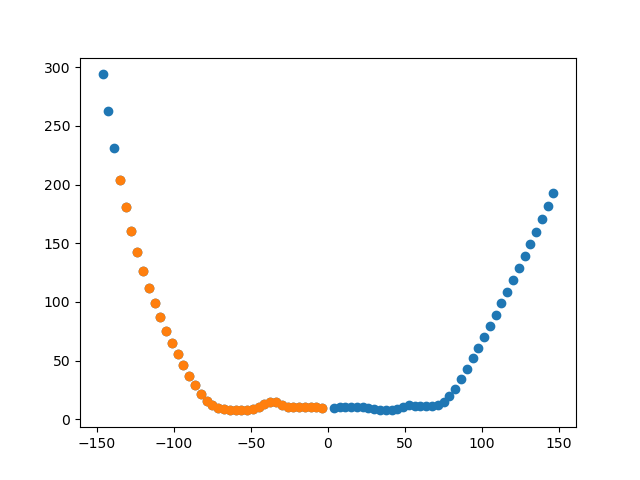

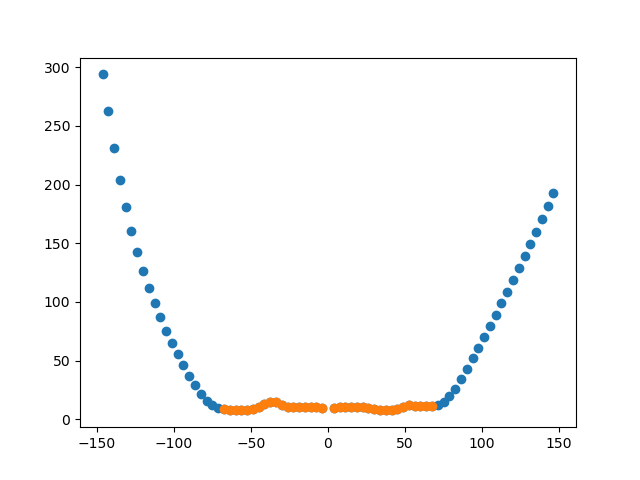

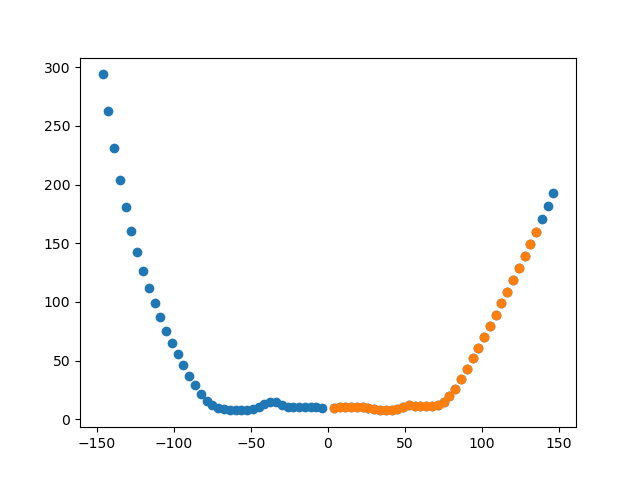

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as sciSpec
import scipy.integrate as integrate
from matplotlib.colors import BoundaryNorm
from matplotlib.patches import FancyArrowPatch


import Backend.Constants as cst
import Backend.Footprint as fp
import Backend.WCTools as WCTools
import Backend.BeamPhysics as BP

twiss_b1  = pd.read_pickle('lhcb1_twiss.pkl')
survey_b1 = pd.read_pickle('lhcb1_survey.pkl')

twiss_b2  = pd.read_pickle('lhcb2_twiss.pkl')
survey_b2 = pd.read_pickle('lhcb2_survey.pkl')


def bet_s(s,plane,_IP):
    ROI_ip_b1 = twiss_b1.loc[f'mb.a8l{_IP[-1]}.b1_dex':f'mb.a8r{_IP[-1]}.b1_den']
    center_s = ROI_ip_b1.loc[_IP,'s']

    return np.interp(s, ROI_ip_b1['s']-center_s,ROI_ip_b1[f'bet{plane}'])

def d_BB(s,_IP):
    # Proper orientation
    if _IP == 'ip1':
        rot = -1
    else:
        rot = 1

    # ROI from dipoles
    ROI_ip_b1 = twiss_b1.loc[f'mb.a8l{_IP[-1]}.b1_dex':f'mb.a8r{_IP[-1]}.b1_den']
    ROI_ip_b2 = twiss_b2.loc[f'mb.a8l{_IP[-1]}.b2_dex':f'mb.a8r{_IP[-1]}.b2_den']

    survey_ip_b1 = survey_b1.loc[f'mb.a8l{_IP[-1]}.b1_dex':f'mb.a8r{_IP[-1]}.b1_den']
    survey_ip_b2 = survey_b2.loc[f'mb.a8l{_IP[-1]}.b2_dex':f'mb.a8r{_IP[-1]}.b2_den']

      
    # lab frame coordinates
    ROI_ip_b1.insert(1,'x_lab',ROI_ip_b1['x'] + rot*survey_ip_b1['z'])
    ROI_ip_b2.insert(1,'x_lab',ROI_ip_b2['x'] + rot*survey_ip_b2['z'])
    
    ROI_ip_b1.insert(1,'y_lab',ROI_ip_b1['y'] + survey_ip_b1['y'])
    ROI_ip_b2.insert(1,'y_lab',ROI_ip_b2['y'] + survey_ip_b2['y'])
    
    center_s = ROI_ip_b1.loc[_IP,'s']
        
    b1_x   = np.interp(s, ROI_ip_b1['s']-center_s, ROI_ip_b1['x_lab'])
    b1_y   = np.interp(s, ROI_ip_b1['s']-center_s, ROI_ip_b1['y_lab'])
    
    b2_x   = np.interp(s, ROI_ip_b2['s']-center_s, ROI_ip_b2['x_lab'])
    b2_y   = np.interp(s, ROI_ip_b2['s']-center_s, ROI_ip_b2['y_lab'])
                                               
    return (b2_x-b1_x),(b2_y-b1_y)


N_LR   = 18*2
for PACMAN_pos,name in zip([0,N_LR//2,N_LR],['First','Middle','Last']):
    N_L = N_LR-PACMAN_pos
    N_R = N_LR-N_L

    s_BBLR = np.arange(0,150,7.5/2)[1:]
    s_BBLR = np.concatenate((-np.flip(s_BBLR),s_BBLR))
    
    d_x,d_y = d_BB(s_BBLR,_IP='ip1')
    sigma = np.sqrt(emitt*bet_s(s_BBLR,'y','ip1'))
    D = np.sqrt(d_x**2+d_y**2)/sigma
    
    #pacman
    s_PAC = s_BBLR[len(s_BBLR)//2-N_L:len(s_BBLR)//2+N_R]
    d_x,d_y = d_BB(s_PAC,_IP='ip1')
    sigma = np.sqrt(emitt*bet_s(s_PAC,'y','ip1'))
    D_PAC = np.sqrt(d_x**2+d_y**2)/sigma
    
    
    plt.figure(name)
    plt.plot(s_BBLR,D,'o',color='C0')
    plt.plot(s_PAC,D_PAC,'o',color='C1')



# Creating pickle files

In [119]:

for seq in ['lhcb1','lhcb2']:
    mad_track.input(f'use, sequence={seq};')
    mad_track.twiss()
    mad_track.survey()
    
    twiss = mad_track.table.twiss.dframe()
    survey = mad_track.table.survey.dframe()

    twiss.to_pickle(f"{seq}_twiss.pkl")
    survey.to_pickle(f"{seq}_survey.pkl")

In [113]:
%cd /home/pbelange/abp/Apps/lhcmask/python_examples/run3_collisions_wire
%run 000_pymask.py
%cd /home/pbelange/abp/footprint

Output()

/home/pbelange/abp/Apps/lhcmask/python_examples/run3_collisions_wire


bash: customization.bash: No such file or directory
GC Warning: Repeated allocation of very large block (appr. size 491520):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 491520):
	May lead to memory leak and poor performance
GC Warning: Repeated allocation of very large block (appr. size 491520):
	May lead to memory leak and poor performance


IP beta test against knobs passed!
IP separation test against knobs passed!
IP beta test against knobs passed!
IP separation test against knobs passed!
Luminosities before leveling (crab cavities are not considered):
L in ip1 is 2.5834412775786533e+34 Hz/cm^2
L in ip2 is 1.5197302224975641e-93 Hz/cm^2
L in ip5 is 2.6254177545614155e+34 Hz/cm^2
L in ip8 is 0.0 Hz/cm^2
Start pythonic leveling:
L in ip1 is 2.583038716997818e+34 Hz/cm^2
L in ip2 is 2.0827129610563726e+30 Hz/cm^2
L in ip5 is 2.6252120368603296e+34 Hz/cm^2
L in ip8 is 2.002294633364364e+33 Hz/cm^2
bb_lr.l2b1_16 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l2b1_20 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_17 Reference systems are not 

mv: 'fc.2' and './fc.2' are the same file
mv: 'fc.3' and './fc.3' are the same file
mv: 'fc.3.aux' and './fc.3.aux' are the same file
mv: 'fc.34' and './fc.34' are the same file
mv: 'fc.8' and './fc.8' are the same file


Warning! on_bb_switch not present
Start building xtrack line...
Done building xtrack.
generating ./beeb0a5a253b49dd996c8841de0c83d4.c
the current directory is '/home/pbelange/abp/Apps/lhcmask/python_examples/run3_collisions_wire'
running build_ext
building 'beeb0a5a253b49dd996c8841de0c83d4' extension
gcc -pthread -B /home/pbelange/abp/Apps/miniconda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/pbelange/abp/Apps/miniconda/include -I/home/pbelange/abp/Apps/miniconda/include -fPIC -O2 -isystem /home/pbelange/abp/Apps/miniconda/include -fPIC -I/home/pbelange/abp/Apps/miniconda/include/python3.9 -c beeb0a5a253b49dd996c8841de0c83d4.c -o ./beeb0a5a253b49dd996c8841de0c83d4.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/pbelange/abp/Apps/miniconda/compiler_compat -shared -Wl,-rpath,/home/pbelange/abp/Apps/miniconda/lib -Wl,-rpath-link,/home/pbelange/abp/Apps/miniconda/lib -L/home/pbelange/abp/Apps/miniconda/lib -L/home/pbelange/abp/App

/home/pbelange/abp/footprint
